In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

history = pd.DataFrame()

for i in range(9):
    f = open('spotify_data/StreamingHistory{}.json'.format(i), encoding='utf-8')
    data = json.load(f)
    df = pd.DataFrame(data)
    history = pd.concat([history, df], ignore_index=True)

history = history.loc[history['trackName'] !="Unknown Track"]
history = history.loc[history['msPlayed'] >=20000]
history['minsPlayed'] = history['msPlayed']/(1000*60)
history['hrsPlayed'] = history['msPlayed']/(1000*60*60)

spring = history.loc[history['endTime']<'2022-05-11'].copy()
summer = history.loc[(history['endTime']>='2022-05-11') & (history['endTime']<'2022-08-28')].copy()
fall = history.loc[history['endTime']>='2022-08-28'].copy()


summer_home = history.loc[(history['endTime']>='2022-05-11') & (history['endTime']<'2022-06-02')].copy()
summer_sf = history.loc[(history['endTime']>='2022-06-02') & (history['endTime']<'2022-08-28')].copy()


spring['endTime']= pd.DatetimeIndex(spring['endTime']).tz_localize('UTC').tz_convert('America/New_York').tz_localize(None)
summer_home['endTime'] = pd.DatetimeIndex(summer_home['endTime']).tz_localize('UTC').tz_convert('America/New_York').tz_localize(None)
summer_sf['endTime']= pd.DatetimeIndex(summer_sf['endTime']).tz_localize('UTC').tz_convert('America/Los_Angeles').tz_localize(None)
fall['endTime']= pd.DatetimeIndex(fall['endTime']).tz_localize('UTC').tz_convert('America/New_York').tz_localize(None)
history = pd.concat([spring, summer_home, summer_sf, fall], ignore_index=True)

summer = pd.concat([summer_home, summer_sf], ignore_index=True)

history['date'] = pd.DatetimeIndex(history['endTime']).date
history

,endTime,artistName,trackName,msPlayed,minsPlayed,hrsPlayed,date,year,month,day,hour,dayofweek
0,2021-12-31 19:03:00,Swedish House Mafia,Save The World,209705,3.495083,0.058251,2021-12-31,2021,12,31,19,4
1,2021-12-31 19:06:00,Sam Feldt,Post Malone (feat. RANI),169642,2.827367,0.047123,2021-12-31,2021,12,31,19,4
2,2021-12-31 19:09:00,Tiësto,Wasted,190013,3.166883,0.052781,2021-12-31,2021,12,31,19,4
3,2021-12-31 19:13:00,Lana Del Rey,Summertime Sadness (Lana Del Rey Vs. Cedric Ge...,214912,3.581867,0.059698,2021-12-31,2021,12,31,19,4
4,2021-12-31 19:17:00,Calvin Harris,This Is What You Came For,222160,3.702667,0.061711,2021-12-31,2021,12,31,19,4
...,...,...,...,...,...,...,...,...,...,...,...,...
67088,2023-01-01 18:28:00,Will Gittens,Vibin,47143,0.785717,0.013095,2023-01-01,2023,1,1,18,6
67089,2023-01-01 18:33:00,Dayglow,Can I Call You Tonight?,278769,4.646150,0.077436,2023-01-01,2023,1,1,18,6
67090,2023-01-01 18:36:00,ILLENIUM,First Time,165779,2.762983,0.046050,2023-01-01,2023,1,1,18,6
67091,2023-01-01 18:40:00,Martin Garrix,No Sleep (feat. Bonn) - DubVision Remix,239062,3.984367,0.066406,2023-01-01,2023,1,1,18,6


In [7]:
from tracks import get_song_album
from tqdm import tqdm

artist_totals = history.groupby(['artistName'])['minsPlayed'].sum().sort_values(ascending=False)
top_artists = artist_totals.index.values[:30]
top_artists_history = history[history['artistName'].isin(top_artists)]

unique_tracks = top_artists_history[['trackName', 'artistName']].drop_duplicates()
albums = {}
max_genres = 0
for index, row in tqdm(unique_tracks.iterrows(), total =unique_tracks.shape[0]):
    key = f"{row['trackName']}_{row['artistName']}"
    albums[key] = get_song_album(row['trackName'], row['artistName'])

100%|██████████| 1427/1427 [05:45<00:00,  4.13it/s]


In [8]:
top_artists_history['album'] = top_artists_history.apply(lambda row: albums[f"{row['trackName']}_{row['artistName']}"], axis=1)
top_artists_history

/var/folders/8j/kqm6ccw15qv8v24hskfgvbg80000gn/T/ipykernel_18016/3478310050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_artists_history['album'] = top_artists_history.apply(lambda row: albums[f"{row['trackName']}_{row['artistName']}"], axis=1)


,endTime,artistName,trackName,msPlayed,minsPlayed,hrsPlayed,date,year,month,day,hour,dayofweek,album
2,2021-12-31 19:09:00,Tiësto,Wasted,190013,3.166883,0.052781,2021-12-31,2021,12,31,19,4,A Town Called Paradise (Deluxe)
4,2021-12-31 19:17:00,Calvin Harris,This Is What You Came For,222160,3.702667,0.061711,2021-12-31,2021,12,31,19,4,This Is What You Came For
15,2021-12-31 21:06:00,Calvin Harris,Outside (feat. Ellie Goulding),227220,3.787000,0.063117,2021-12-31,2021,12,31,21,4,Motion
16,2021-12-31 21:10:00,David Guetta,Like I Do,201527,3.358783,0.055980,2021-12-31,2021,12,31,21,4,7
18,2021-12-31 21:31:00,Bryce Vine,Drew Barrymore - Crankdat Remix,103037,1.717283,0.028621,2021-12-31,2021,12,31,21,4,Drew Barrymore EP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67080,2023-01-01 18:00:00,Khalid,Young Dumb & Broke,202546,3.375767,0.056263,2023-01-01,2023,1,1,18,6,American Teen
67087,2023-01-01 18:21:00,Khalid,Last Call,191375,3.189583,0.053160,2023-01-01,2023,1,1,18,6,Last Call
67090,2023-01-01 18:36:00,ILLENIUM,First Time,165779,2.762983,0.046050,2023-01-01,2023,1,1,18,6,Fallen Embers (Deluxe Version)
67091,2023-01-01 18:40:00,Martin Garrix,No Sleep (feat. Bonn) - DubVision Remix,239062,3.984367,0.066406,2023-01-01,2023,1,1,18,6,2019 Remixed


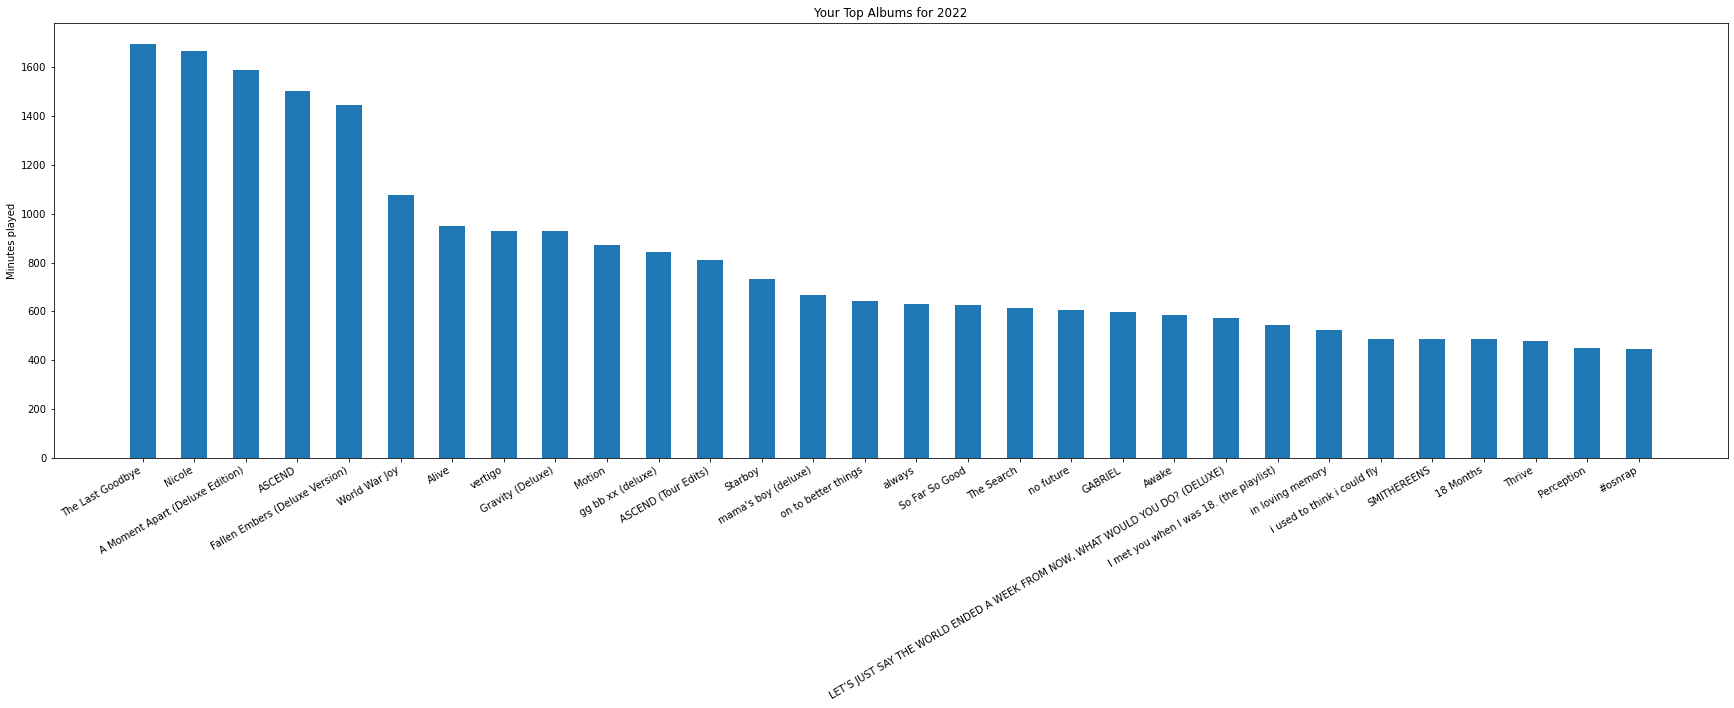

In [42]:
album_totals = top_artists_history.groupby(['album', 'artistName'], as_index=False)['minsPlayed'].sum().sort_values(by='minsPlayed', ascending=False)
values = album_totals['minsPlayed'].values[:30]
labels = album_totals['album'].values[:30]
indexes = np.arange(len(labels))

plt.figure(figsize=(30,8))
plt.title('Your Top Albums for 2022')
plt.bar(indexes, values, 0.5)
plt.xticks(indexes, labels, rotation = 30, ha='right')
plt.ylabel('Minutes played')
plt.show()

In [39]:
top_albums = album_totals['album'][:10]
all_dates = history[['date']].drop_duplicates()
album_daily_totals = top_artists_history.groupby(['date', 'album'], as_index=False)['minsPlayed'].agg(sum)
top_albums_df = pd.DataFrame()
for album in top_albums:
    album_df =  all_dates.merge(album_daily_totals.loc[album_daily_totals['album']==album], how='left', on = ['date'])
    album_df['album'].fillna(value=album, inplace=True)
    album_df['minsPlayed'].fillna(value=0, inplace=True)
    album_df['avg_minsPlayed'] = album_df['minsPlayed'].rolling(14, win_type='gaussian', center=True).mean(std=3)
    top_albums_df = pd.concat([top_albums_df, album_df])
top_albums_df



,date,album,artistName,minsPlayed,avg_minsPlayed
0,2021-12-31,The Last Goodbye,NaN,0.000000,NaN
1,2022-01-01,The Last Goodbye,NaN,0.000000,NaN
2,2022-01-02,The Last Goodbye,NaN,0.000000,NaN
3,2022-01-03,The Last Goodbye,NaN,0.000000,NaN
4,2022-01-04,The Last Goodbye,NaN,0.000000,NaN
...,...,...,...,...,...
362,2022-12-28,Motion,NaN,0.000000,NaN
363,2022-12-29,Motion,NaN,0.000000,NaN
364,2022-12-30,Motion,NaN,0.000000,NaN
365,2022-12-31,Motion,Calvin Harris,3.071333,NaN


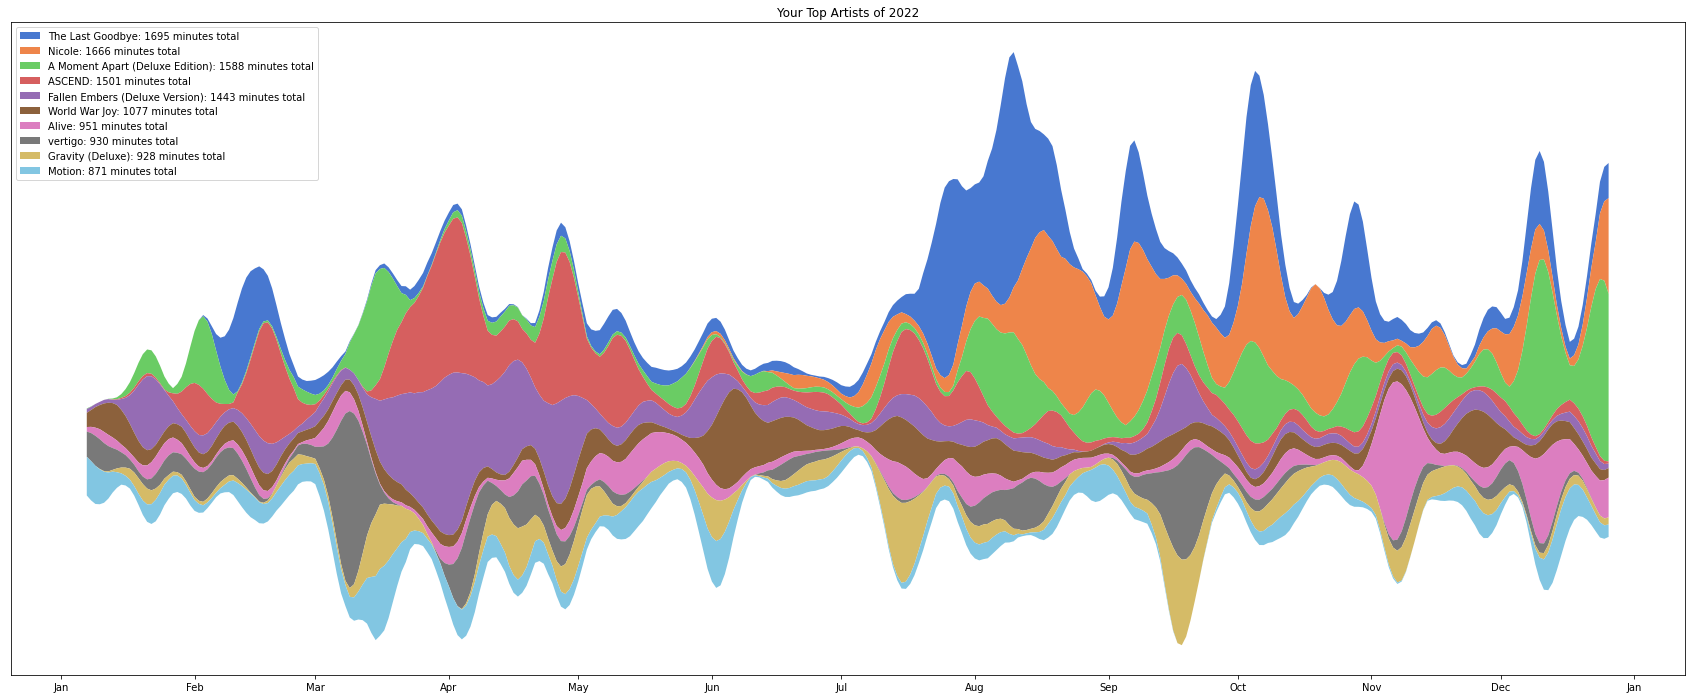

In [12]:
from utils import streamgraph

y_labels  = [f'{top_albums[i]}: {round(album_totals[i])} minutes total' for i in range(len(top_albums))]
album_daily_avgmins = [top_albums_df.loc[top_albums_df['album']==album, 'avg_minsPlayed'] for album in top_albums]
streamgraph(dates = all_dates['date'].values, ys=album_daily_avgmins, labels = y_labels, title='Your Top Albums of 2022')

/Users/jyin/spotify-analysis/utils.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontweight='bold', color=pal[num_factors-1])


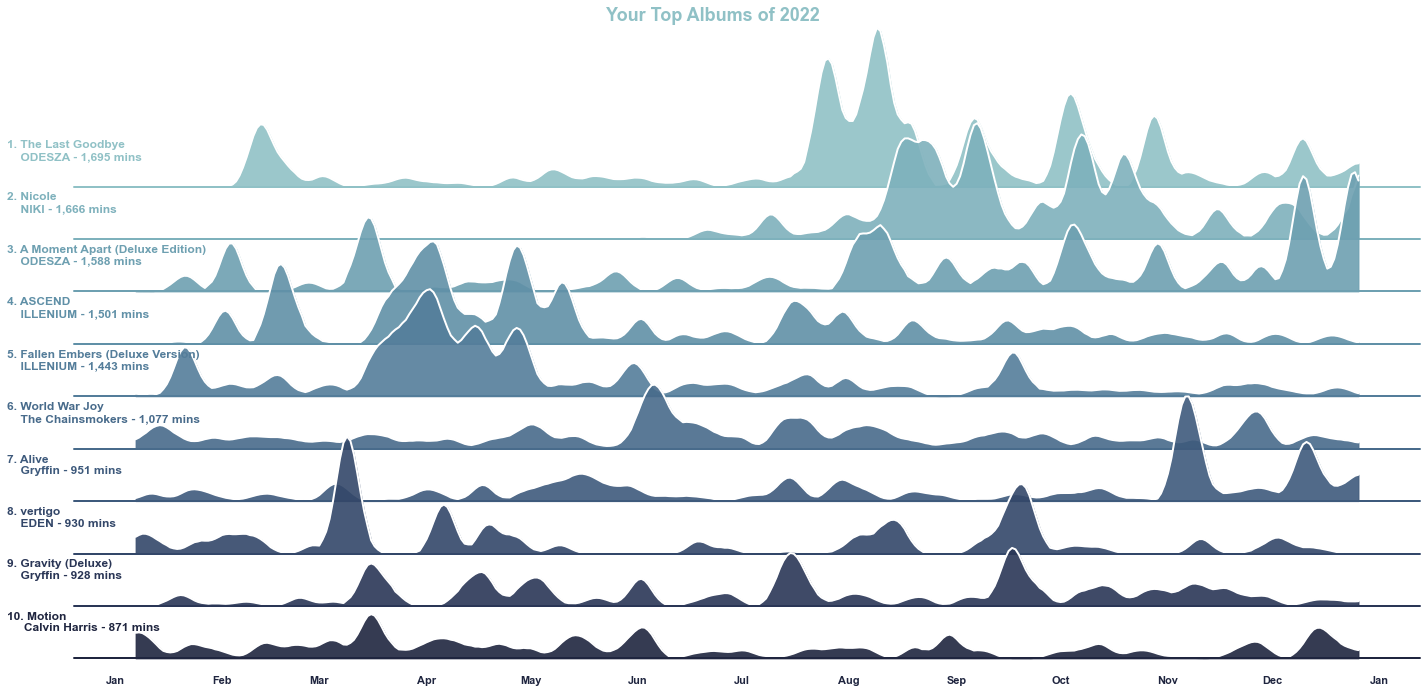

In [48]:
from utils import timeseries_ridgeplot


# def label_formatter(album_name):

y_labels = {top_albums[i]: f"{i+1}. {top_albums[i]}\n" + " "*(3+len(str(i+1)))+ f"{album_totals.loc[album_totals['album'] == top_albums[i], 'artistName'].values[0]} - {round(album_totals.loc[album_totals['album'] == top_albums[i], 'minsPlayed'].values[0]):,} mins"  for i in range(len(top_albums))}

timeseries_ridgeplot(top_albums_df, factor='album', y='avg_minsPlayed', dateCol = 'date', title='Your Top Albums of 2022', save_name='top_albums.png', labels=y_labels)

In [45]:
album_totals.loc[album_totals['album'] == top_albums[i], 'artistName'].values

array(['Gryffin'], dtype=object)

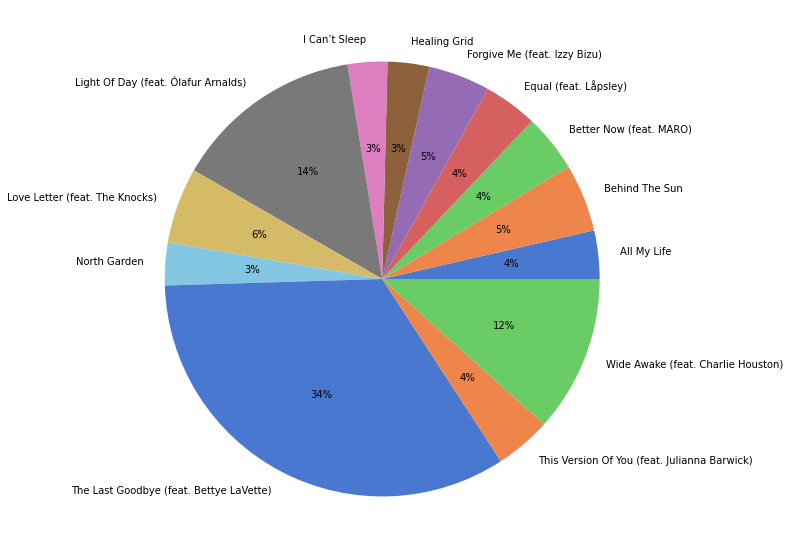

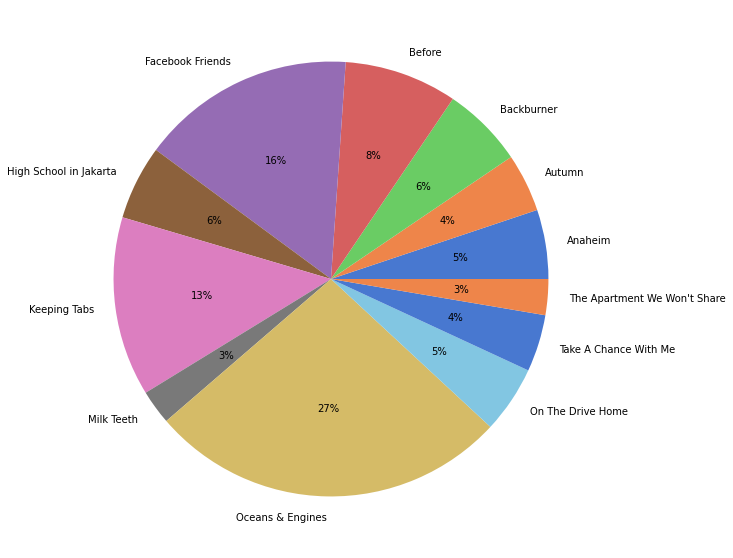

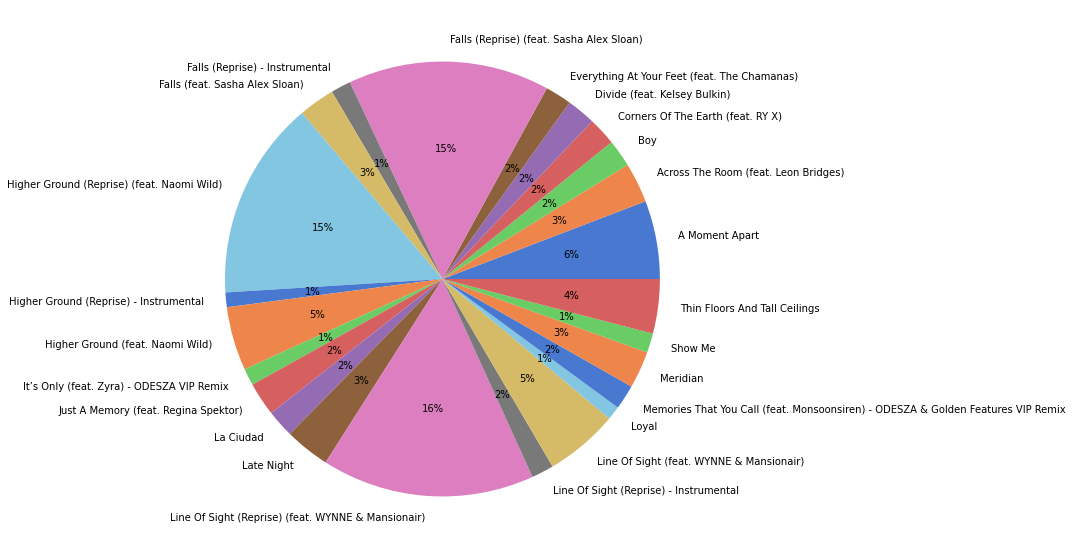

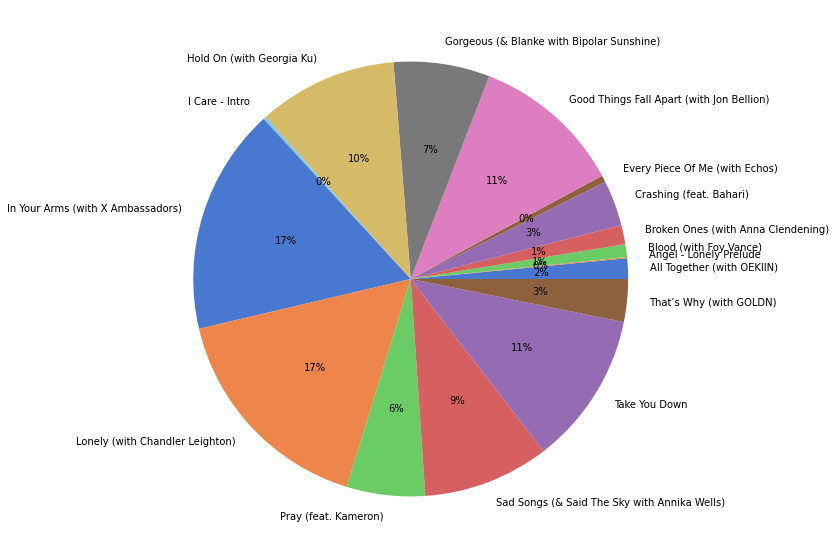

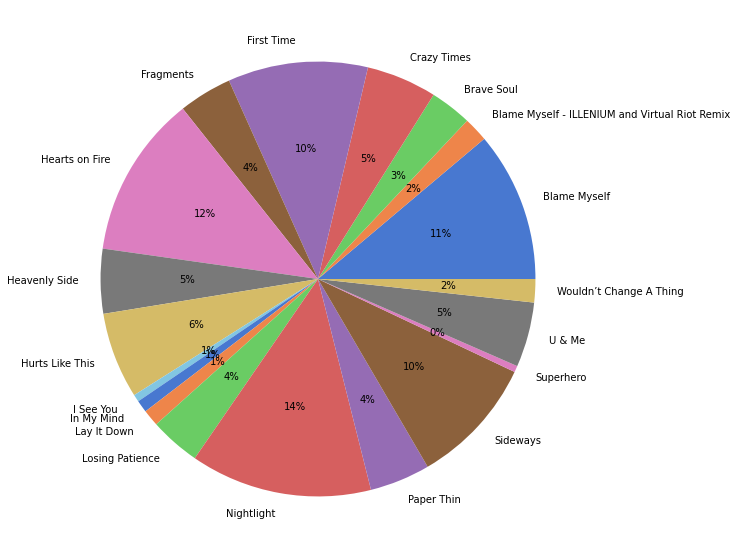

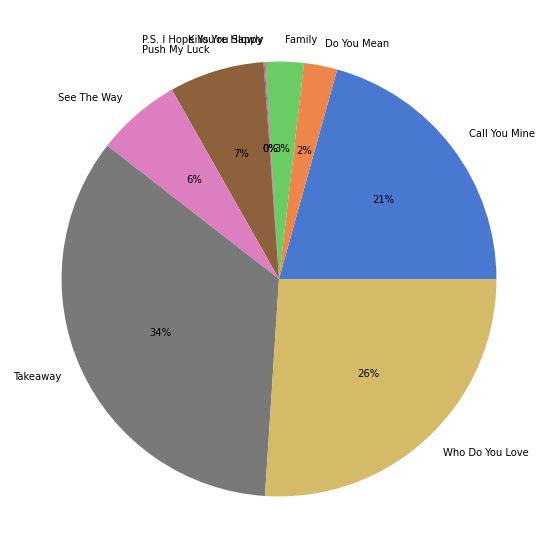

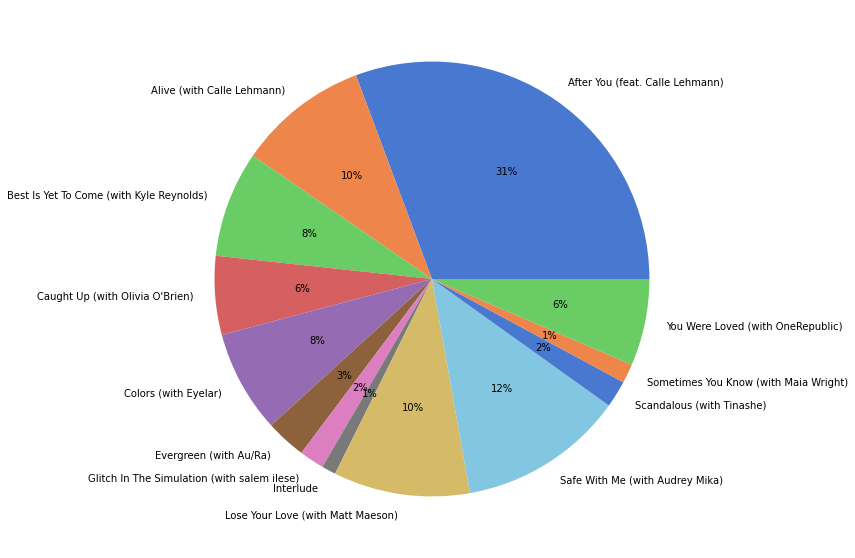

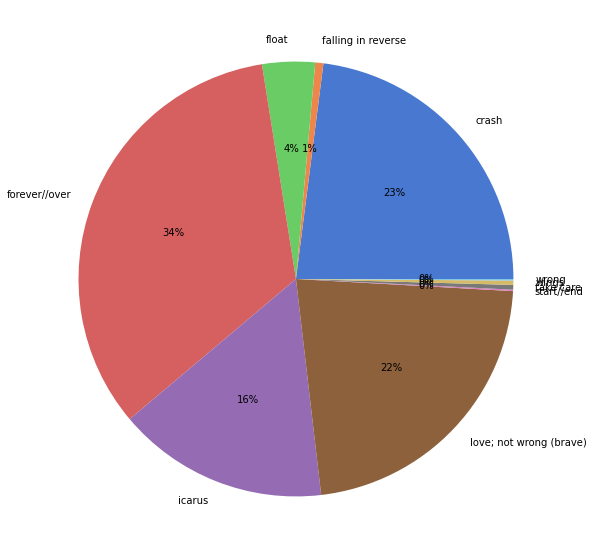

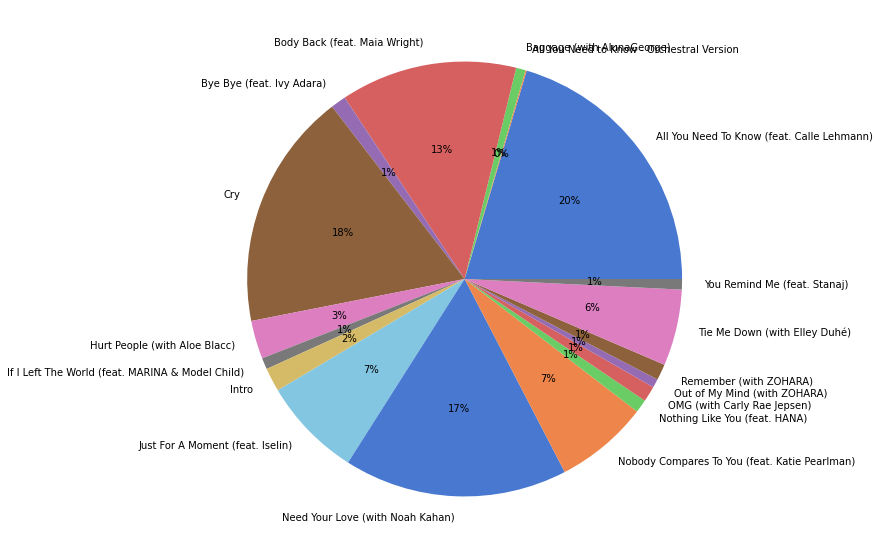

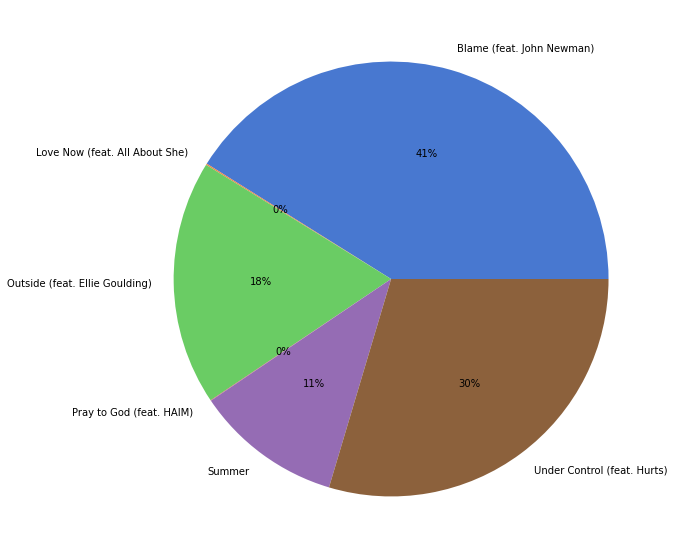

In [35]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
colors = sns.color_palette('muted')
mpl.rcParams['figure.facecolor'] = 'white'

for alb in top_albums:
    time_breakdown = top_artists_history[top_artists_history['album']== alb].groupby(['trackName'], as_index=False)['minsPlayed'].sum()
    plt.figure(figsize=(10,10))
    plt.pie(time_breakdown['minsPlayed'].values, labels = time_breakdown['trackName'].values, colors=colors, autopct='%.0f%%')
    plt.show()